<a href="https://colab.research.google.com/github/ventus550/HandwritingRecognition/blob/master/notebooks/shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Init

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/mount', force_remount=False)
    %cd mount/MyDrive/MachineLearningProjects/HandwritingRecognition/notebooks
except ModuleNotFoundError: ...

Drive already mounted at /content/mount; to attempt to forcibly remount, call drive.mount("/content/mount", force_remount=True).
/content/mount/MyDrive/MachineLearningProjects/HandwritingRecognition/notebooks


In [ ]:
import os, sys
sys.path.append("..")

In [ ]:
!pip install shap==0.41 > /dev/null

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
import keras
from keras.layers import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path

import shap
import utils

In [ ]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.experimental.output_all_intermediates(True)
# tf.compat.v1.disable_v2_behavior()

## Configuration

In [ ]:
BASEDIR = Path().absolute().parent
DESTDIR = BASEDIR / "data"
MODLDIR = BASEDIR / "models"
DATASET = DESTDIR / "words.npz"
model_name = "5%.h5"

## Load data and model

In [ ]:
model = utils.load(MODLDIR / model_name)
characters = model.meta["characters"]
print(model.meta)

{'name': 'oracle', 'epochs': 20, 'characters': '!"#&\'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz', 'padded': -1, 'maxlen': 21}


In [ ]:
X, Y = np.load(DATASET).values()
X, C = utils.format_data(X, Y, list(characters))

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


## Explain model with SHAP

In [ ]:
classifier = keras.models.Model(model.input, tf.reduce_max(model.output, axis=1))

In [ ]:
def f(X):
    tmp = X.copy()
    tmp = classifier(tmp)
    # Drop special tokens
    return tmp[:, :len(characters)]

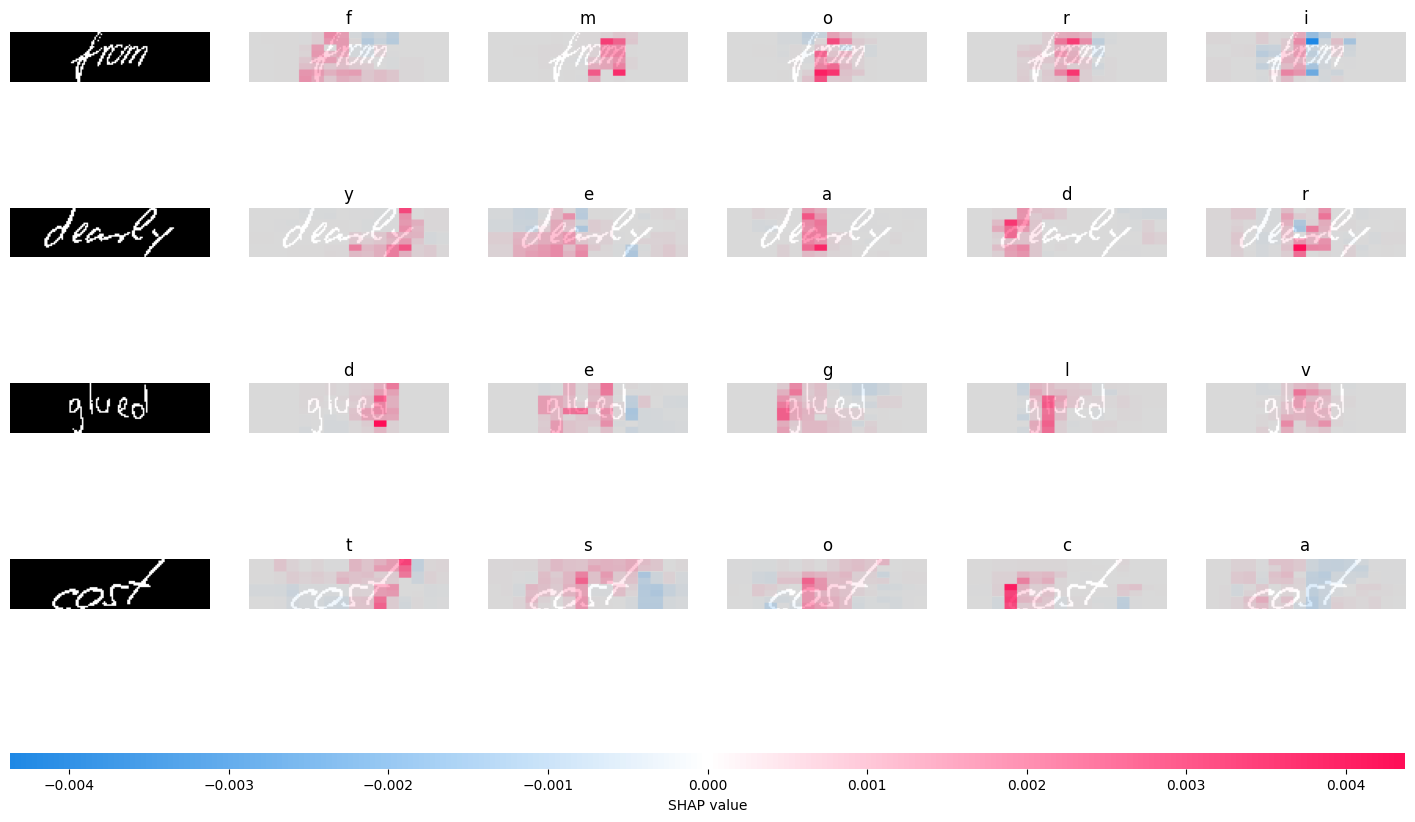

In [ ]:
masker = shap.maskers.Image("inpaint_telea", X[0].shape)
explainer = shap.Explainer(f, masker, output_names=list(characters))
shap_values = explainer(X[[0, 4, 15, 123]], max_evals=1000, batch_size=100, outputs=shap.Explanation.argsort.flip[:5])
shap.image_plot(shap_values)

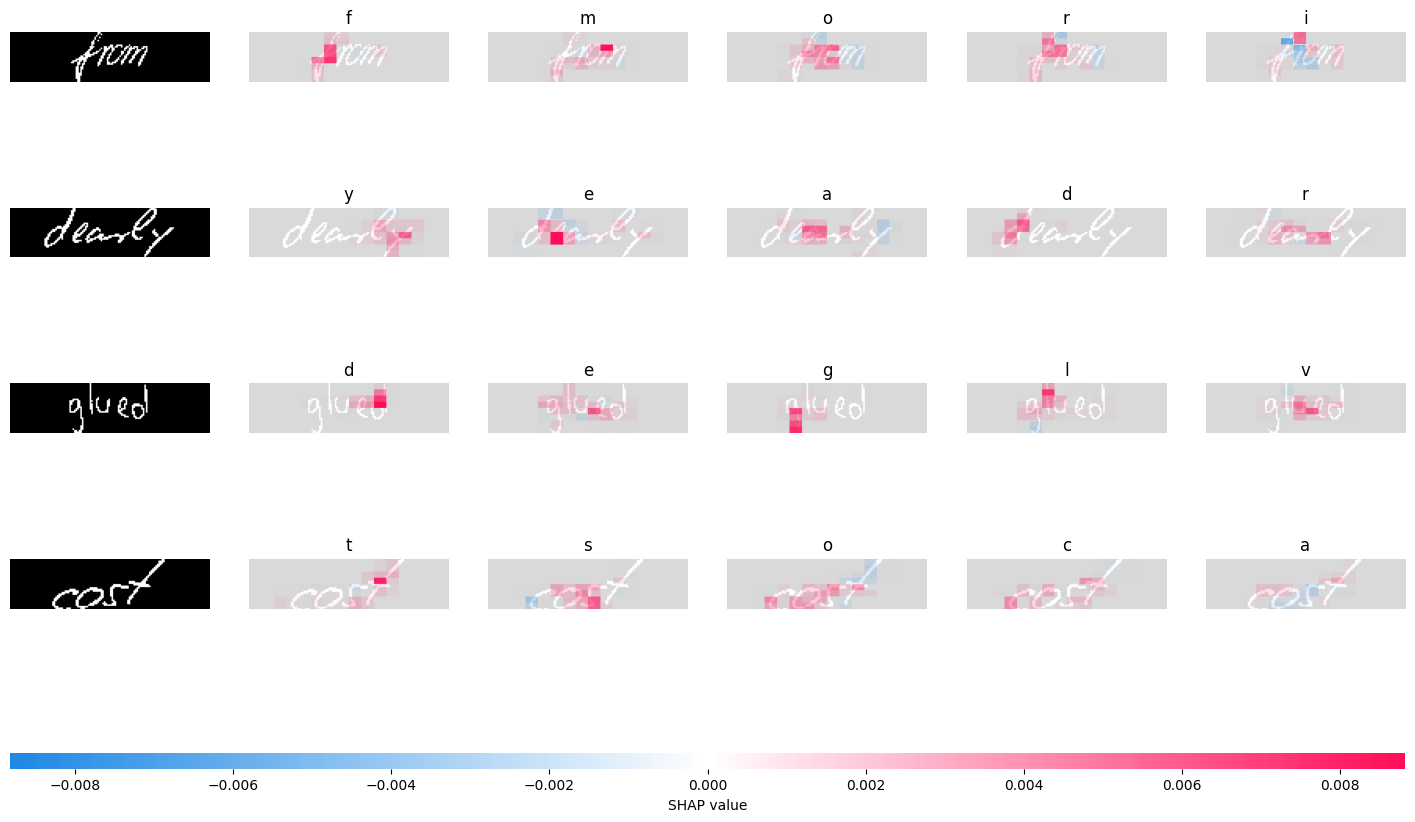

In [ ]:
masker = shap.maskers.Image("blur(32, 32)", X[0].shape)
explainer = shap.Explainer(f, masker, output_names=list(characters))
shap_values = explainer(X[[0, 4, 15, 123]], max_evals=1000, batch_size=100, outputs=shap.Explanation.argsort.flip[:5])
shap.image_plot(shap_values)